# Tensorflow synth

In [1]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

/Users/i348523/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

## Simple sin sound

In [3]:
def save(file_name, audio, samples_per_second):
    encoded_audio_data = tf.contrib.ffmpeg.encode_audio(audio, 
                                                        file_format='wav', 
                                                        samples_per_second=samples_per_second)
    tf.write_file(file_name, encoded_audio_data)

def plot(data, length=441):
    data = data[:length, :]
    plt.plot(data)

In [4]:
samples_per_second = 44100 
length_in_seconds = 5
freq1 = 440
x = samples_per_second * length_in_seconds
sin1 = tf.sin(tf.lin_space(-math.pi, math.pi, x) * freq1 * length_in_seconds)
sin1 = tf.reshape(sin1, (x, 1))

In [5]:
save('sin.wav', sin1, samples_per_second)
ipd.Audio('sin.wav')

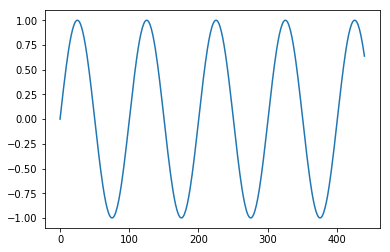

In [6]:
plot(sin1.numpy())

## Frequency modulation

In [35]:
freq2 = 740
freq = 1800
t = tf.lin_space(-math.pi, math.pi, x) * length_in_seconds
sin2 = tf.sin(t * freq2 + tf.sin(t * freq))
sin2 = tf.reshape(sin2, (x, 1))
fm = sin2

In [36]:
save('fm.wav', fm, samples_per_second)
ipd.Audio('fm.wav')

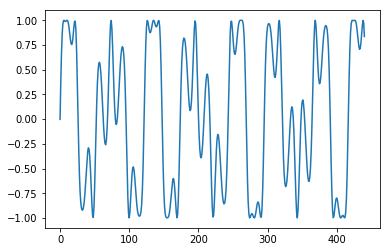

In [38]:
plot(fm.numpy(), length=441)

## Amplitude modulation

In [39]:
freq3 = 10
sin3 = tf.sin(tf.lin_space(-math.pi, math.pi, x) * freq3 * length_in_seconds)
modulator = 1.0 + 0.25 * sin3
modulator = tf.reshape(sin3, (x, 1))
am = sin2 * modulator

In [40]:
save('am.wav', am, samples_per_second)
ipd.Audio('am.wav')

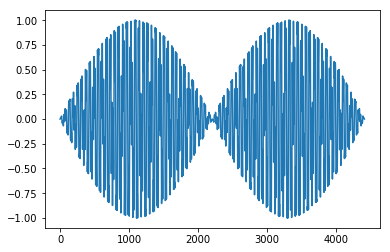

In [41]:
plot(am.numpy(), length=4410)